<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000         

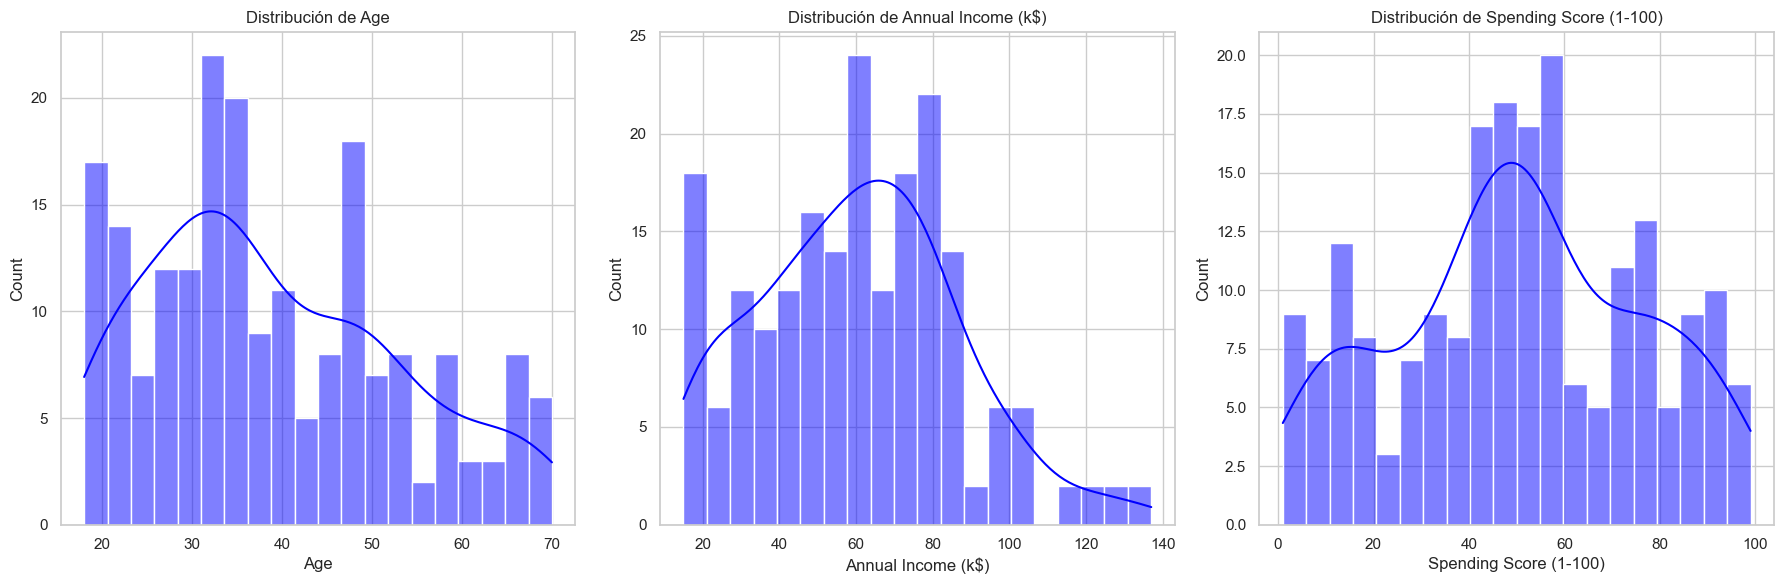

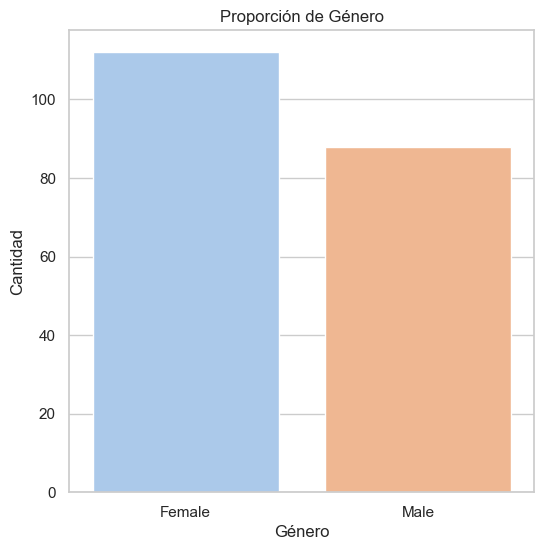

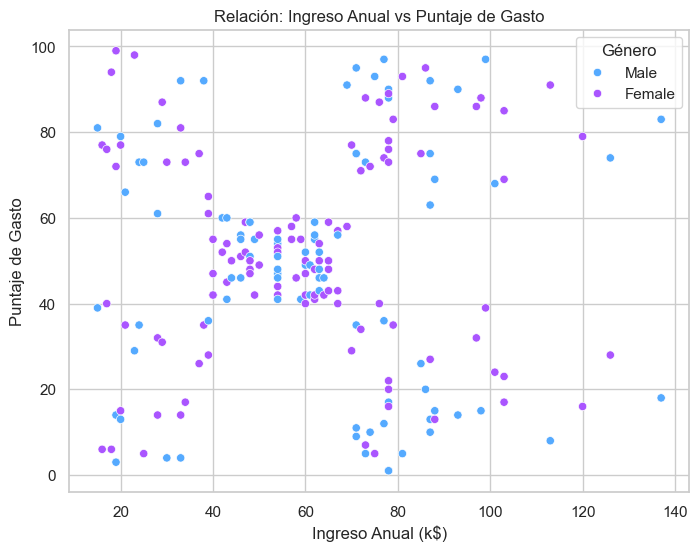

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

file_path = "./Mall_Customers.csv"
mall_data = pd.read_csv(file_path)

mall_data.info()

print(mall_data.describe())

plt.figure(figsize=(18, 6))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(mall_data[column], kde=True, bins=20, color='blue')
    plt.title(f"Distribución de {column}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
gender_counts = mall_data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title("Proporción de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='cool')
plt.title("Relación: Ingreso Anual vs Puntaje de Gasto")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.legend(title="Género")
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
mall_data['Gender'] = label_encoder.fit_transform(mall_data['Gender'])

scaler = StandardScaler()
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
mall_data[columns_to_scale] = scaler.fit_transform(mall_data[columns_to_scale])

print(mall_data.head())


   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980


In [9]:
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]
print(features.head())


   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


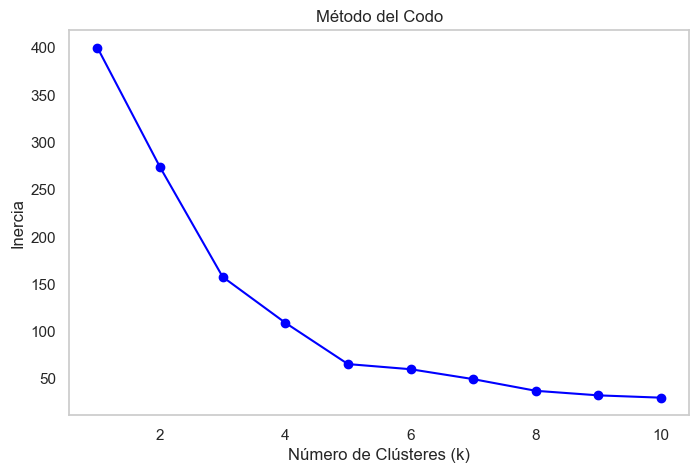

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'o-', color='blue')
plt.title("Método del Codo")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.grid()
plt.show()


In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

optimal_k = 5
    
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)

labels = kmeans.labels_
silhouette_avg = silhouette_score(features, labels)
calinski_harabasz = calinski_harabasz_score(features, labels)

print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")


Coeficiente de Silhouette: 0.55
Índice de Calinski-Harabasz: 248.65


In [15]:
# Se seleccionaron 5 clústeres porque este valor ofrece el mejor equilibrio
# entre las métricas utilizadas. El Coeficiente de Silhouette alcanzó su valor
# más alto con 5 clústeres, lo que indica que los grupos están bien definidos
# y separados. Aunque con 8 o 9 clústeres el Índice de Calinski-Harabasz fue
# más alto, esto podría deberse a una mayor compactación de los clústeres a
# expensas de una menor separación entre ellos, como lo refleja el menor Coeficiente
# de Silhouette. Por esta razón, optamos por trabajar con 5 clústeres, ya que es
# la mejor opción en balance para ambos parámetros.

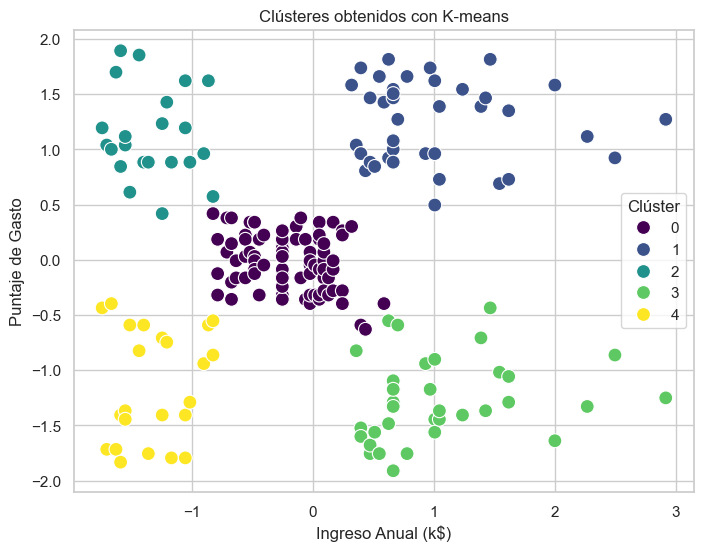

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Annual Income (k$)'], 
                y=features['Spending Score (1-100)'], 
                hue=labels, 
                palette='viridis', 
                s=100)
plt.title("Clústeres obtenidos con K-means")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.legend(title="Clúster")
plt.show()


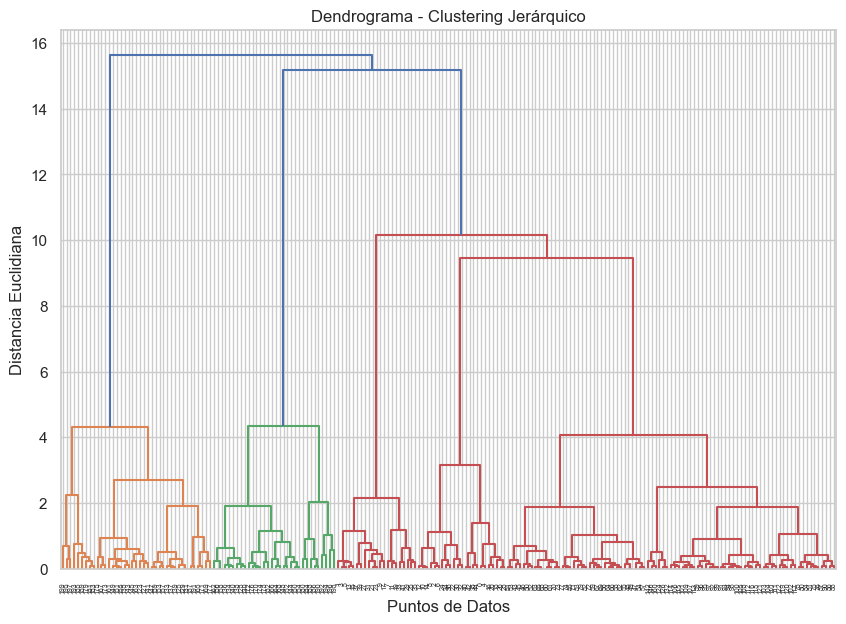

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Puntos de Datos")
plt.ylabel("Distancia Euclidiana")
plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering

optimal_clusters_hc = 5
hc_model = AgglomerativeClustering(n_clusters=optimal_clusters_hc, metric='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(features)

print("Etiquetas de los Clústeres:", hc_labels)


Etiquetas de los Clústeres: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_avg_hc = silhouette_score(features, hc_labels)
calinski_harabasz_hc = calinski_harabasz_score(features, hc_labels)

print(f"Coeficiente de Silhouette: {silhouette_avg_hc:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_hc:.2f}")


Coeficiente de Silhouette: 0.55
Índice de Calinski-Harabasz: 244.41


In [25]:
# Para el método de agrupamiento jerárquico, seleccionamos 5
# clústeres como el número óptimo, ya que proporcionaron el
# mejor equilibrio entre las métricas evaluadas. El Coeficiente
# de Silhouette alcanzó su valor más alto con 5 clústeres, lo
# que sugiere una adecuada separación y definición de los grupos.
# Aunque con 8 o 9 clústeres el Índice de Calinski-Harabasz fue
# más elevado, el Coeficiente de Silhouette disminuyó considerablemente,
# indicando una pérdida en la calidad de la separación entre clústeres.
# Por lo tanto, decidimos trabajar con 5 clústeres, ya que representa el
# punto de equilibrio más adecuado entre ambas métricas, asegurando
# clústeres compactos y bien diferenciados.

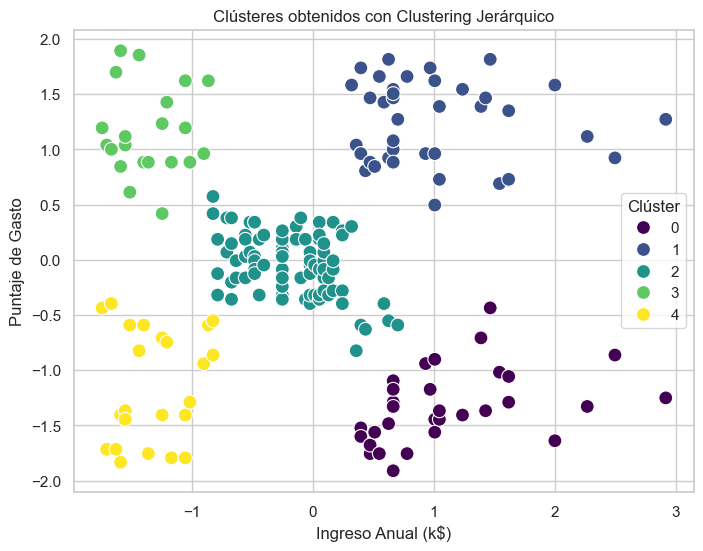

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Annual Income (k$)'], 
                y=features['Spending Score (1-100)'], 
                hue=hc_labels, 
                palette='viridis', 
                s=100)
plt.title("Clústeres obtenidos con Clustering Jerárquico")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.legend(title="Clúster")
plt.show()
